# **NBA Career Prediction**
**Predict 5-Year Career Longevity for NBA Rookies**

## WEEK 2 - EDA

In this project, we are trying to classify a rookie player will last at least 5 years in the NBA or not. In this notebook, we will explore and visualize data and prepare dataset for modeling.

More Data cleaning is performed compared to week 1.

**The steps are:**
1. Read Data
    * Import Libraries
    * Load data
2. Data Exploration 
3. Data visualization
3. Prepare data

## 1. Read data

##### **[1.1]** Import all modules needed

In [1]:
# Essentials
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.preprocessing import StandardScaler
from joblib import dump
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE


# Other
import warnings
warnings.filterwarnings(action="ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pd.options.display.max_seq_items = 8000
# pd.options.display.max_rows = 20


##### **[1.2]** Download train.csv and test.csv into data/raw folder then read data in notebook

In [2]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

##### **[1.3]** Display dimensions of train and test dataframe

In [3]:
train.shape

(8000, 21)

In [4]:
test.shape

(3799, 20)

##### **[1.4]** Display summary of train and test dataframe

In [5]:
# total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


## 2. Data Exploration

##### **[2.1]** Check distribution of target variable

In [7]:
train['TARGET_5Yrs'].value_counts()/len(train)

1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

**Note**:

Target variable is imbalanced, should consider SMOTE, Oversampling or other methods -> TBC


##### **[2.2]** Check Id is unique or not

In [8]:
len(train['Id'].unique())

8000

##### **[2.3]** Check duplicate

In [9]:
train[train.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, GP, MIN, PTS, FGM, FGA, FG%, 3P Made, 3PA, 3P%, FTM, FTA, FT%, OREB, DREB, REB, AST, STL, BLK, TOV, TARGET_5Yrs]
Index: []

[0 rows x 21 columns]

##### **[2.4]** Display descriptive data of train and test dataframe

In [10]:
train.describe()

Id           GP          MIN          PTS          FGM  \
count   8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean    6856.971000    62.777875    18.576662     7.267088     2.807037   
std     3977.447579    17.118774     8.935263     4.318732     1.693373   
min        4.000000    -8.000000     2.900000     0.800000     0.300000   
25%     3413.750000    51.000000    12.000000     4.100000     1.600000   
50%     6787.500000    63.000000    16.800000     6.300000     2.400000   
75%    10299.250000    74.000000    23.500000     9.500000     3.700000   
max    13798.000000   123.000000    73.800000    34.200000    13.100000   

               FGA          FG%      3P Made          3PA          3P%  ...  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000  ...   
mean      6.231212    44.608900     0.264525     0.816562    19.583700  ...   
std       3.584559     6.155453     0.384093     1.060964    16.003155  ...   
min       0.800000    21.300000    -1.100000    -3.100000   -38.500000  ...   
25%       3.600000    40.400000     0.000000     0.100000     8.400000  ...   
50%       5.400000    44.400000     0.300000     0.800000    19.500000  ...   
75%       8.100000    48.700000     0.500000     1.500000    30.600000  ...   
max      28.900000    67.200000     1.700000     4.700000    82.100000  ...   

               FTA          FT%         OREB         DREB          REB  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean      1.947788    71.365825     1.077838     2.168500     3.245300   
std       1.252352    10.430447     0.785670     1.392224     2.085154   
min       0.000000   -13.300000     0.000000     0.200000     0.300000   
25%       1.000000    65.000000     0.500000     1.100000     1.700000   
50%       1.700000    71.400000     0.900000     1.900000     2.800000   
75%       2.600000    77.500000     1.500000     2.900000     4.300000   
max      11.100000   168.900000     5.500000    11.000000    15.900000   

               AST          STL          BLK          TOV  TARGET_5Yrs  
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000  
mean      1.624513     0.648687     0.245212     1.257763     0.833625  
std       1.355986     0.407626     0.821037     0.723270     0.372440  
min       0.000000     0.000000   -17.900000     0.100000     0.000000  
25%       0.700000     0.300000     0.100000     0.700000     1.000000  
50%       1.300000     0.600000     0.200000     1.100000     1.000000  
75%       2.200000     0.900000     0.400000     1.600000     1.000000  
max      12.800000     3.600000    18.900000     5.300000     1.000000  

[8 rows x 21 columns]

In [11]:
test.describe()

Id           GP          MIN          PTS          FGM  \
count   3799.000000  3799.000000  3799.000000  3799.000000  3799.000000   
mean    7010.614109    62.853909    18.650224     7.328034     2.835404   
std     3954.173641    17.151740     8.727259     4.294724     1.688427   
min        1.000000     6.000000     3.700000     0.700000     0.300000   
25%     3644.000000    51.000000    12.200000     4.200000     1.600000   
50%     7062.000000    63.000000    17.000000     6.400000     2.500000   
75%    10402.500000    74.000000    23.300000     9.400000     3.700000   
max    13792.000000   126.000000    68.000000    33.000000    13.400000   

               FGA          FG%      3P Made          3PA          3P%  \
count  3799.000000  3799.000000  3799.000000  3799.000000  3799.000000   
mean      6.302580    44.599079     0.255962     0.796920    19.234746   
std       3.579221     6.040168     0.380987     1.052862    15.968989   
min       0.800000    25.100000    -1.000000    -2.700000   -38.000000   
25%       3.700000    40.500000    -0.000000     0.100000     8.500000   
50%       5.500000    44.600000     0.300000     0.800000    19.400000   
75%       8.100000    48.500000     0.500000     1.500000    30.250000   
max      26.200000    74.600000     1.600000     4.300000    73.800000   

               FTM          FTA          FT%         OREB         DREB  \
count  3799.000000  3799.000000  3799.000000  3799.000000  3799.000000   
mean      1.399842     1.953567    71.612924     1.096025     2.179495   
std       0.926140     1.250376    10.457336     0.785678     1.371935   
min       0.000000     0.000000    23.700000     0.000000     0.200000   
25%       0.700000     1.000000    65.000000     0.500000     1.200000   
50%       1.200000     1.700000    71.500000     0.900000     1.900000   
75%       1.900000     2.600000    78.000000     1.500000     2.900000   
max       7.800000     9.800000   127.100000     6.900000    12.000000   

               REB          AST          STL          BLK          TOV  
count  3799.000000  3799.000000  3799.000000  3799.000000  3799.000000  
mean      3.275783     1.636483     0.653593     0.257726     1.257910  
std       2.070646     1.335496     0.410573     0.639660     0.712449  
min       0.300000     0.000000     0.000000    -7.100000     0.100000  
25%       1.800000     0.600000     0.400000     0.100000     0.700000  
50%       2.800000     1.300000     0.600000     0.200000     1.100000  
75%       4.300000     2.300000     0.900000     0.400000     1.600000  
max      18.500000     9.000000     2.700000    14.800000     5.200000

**Note:** 
1. MIN has max value in 73.8 in train and 68 in test, which is not likely, given 48mins/game. -> examine number of instances
2. FT% has max value >100 in train and test, not possible -> examine number of instances.
3. Columns containing negative values in both train and test, but these values should not be negative: 
* Train set: GP, 3P Made, 3PA, 3P%, BLK, FT% 
* Test set: 3P Made, 3PA, 3P%, BLK
* Columns containing negative values in Train only: GP, FT%

##### **[2.5]** Check the number of abnormal value in MIN and FT%

In [12]:
# MIN > 48
len(train[train["MIN"] > 48].index), len(test[test["MIN"] > 48].index)

(56, 19)

In [13]:
# FT% > 100
len(train[train["FT%"] > 100].index), len(test[test["FT%"] > 100].index)

(58, 30)

##### **[2.6]** Find % of all columns containing negative values in train and test

In [14]:
(train < 0).sum(axis = 0)/train.shape[0]

Id             0.000000
GP             0.000250
MIN            0.000000
PTS            0.000000
FGM            0.000000
FGA            0.000000
FG%            0.000000
3P Made        0.203625
3PA            0.207250
3P%            0.109750
FTM            0.000000
FTA            0.000000
FT%            0.000125
OREB           0.000000
DREB           0.000000
REB            0.000000
AST            0.000000
STL            0.000000
BLK            0.131000
TOV            0.000000
TARGET_5Yrs    0.000000
dtype: float64

In [15]:
(test < 0).sum(axis = 0)/test.shape[0]

Id         0.000000
GP         0.000000
MIN        0.000000
PTS        0.000000
FGM        0.000000
FGA        0.000000
FG%        0.000000
3P Made    0.204001
3PA        0.203475
3P%        0.114504
FTM        0.000000
FTA        0.000000
FT%        0.000000
OREB       0.000000
DREB       0.000000
REB        0.000000
AST        0.000000
STL        0.000000
BLK        0.120032
TOV        0.000000
dtype: float64

##### **[2.7]** Further investigate negative values

In [16]:
train[train["GP"] < 0].index

Int64Index([5323, 7400], dtype='int64')

In [17]:
train[train["FT%"] < 0].index

Int64Index([3059], dtype='int64')

In [18]:
name_list = ["3P Made", "3PA", "3P%", "BLK"]
for name in name_list:
    print(f"No. of Negative values in column '{name}' in (train, test): ({len(train[train[name] < 0].index)}, {len(test[test[name] < 0].index)})")

No. of Negative values in column '3P Made' in (train, test): (1629, 775)
No. of Negative values in column '3PA' in (train, test): (1658, 773)
No. of Negative values in column '3P%' in (train, test): (878, 435)
No. of Negative values in column 'BLK' in (train, test): (1048, 456)


**Note:** 

Substitude all negative values with mode of that column. Compared to deleting 3 columns in week 1, I think substituting with mode value is more unbiased.

## 3. Data visualization

##### **[3.1]** Correlation between X and y

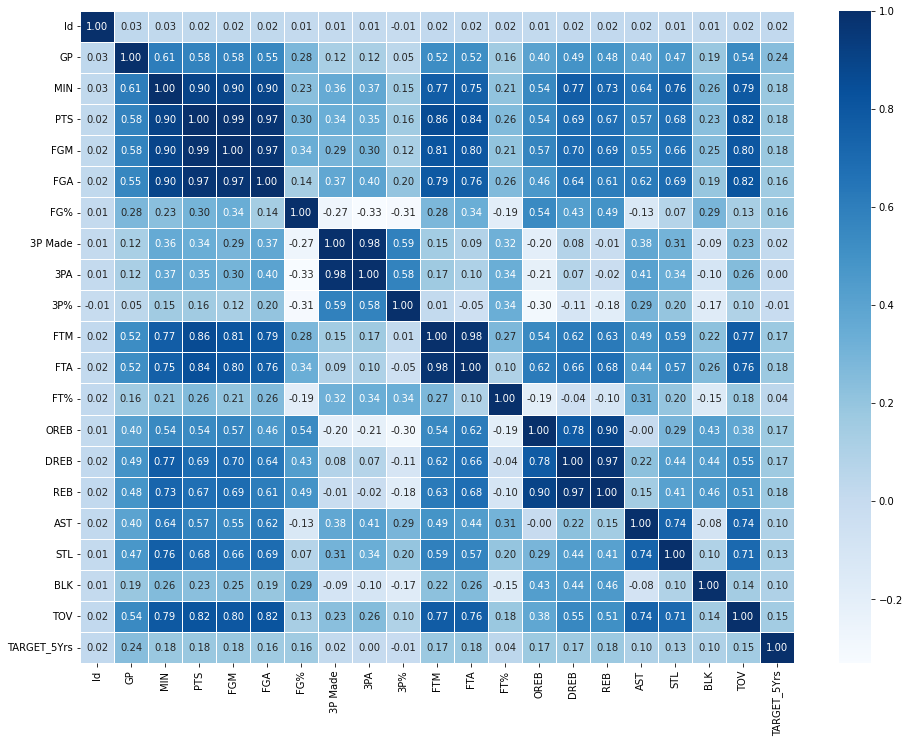

In [19]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

##### **[3.2]** Distribution of all variables

<Figure size 720x2160 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='GP'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='MIN'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='PTS'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='FGM'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='FGA'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='FG%'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='3P Made'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='3PA'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='3P%'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='FTM'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='FTA'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='FT%'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='OREB'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='DREB'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='REB'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='AST'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='STL'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='BLK'>

<AxesSubplot:>

<AxesSubplot:xlabel='Id', ylabel='TOV'>

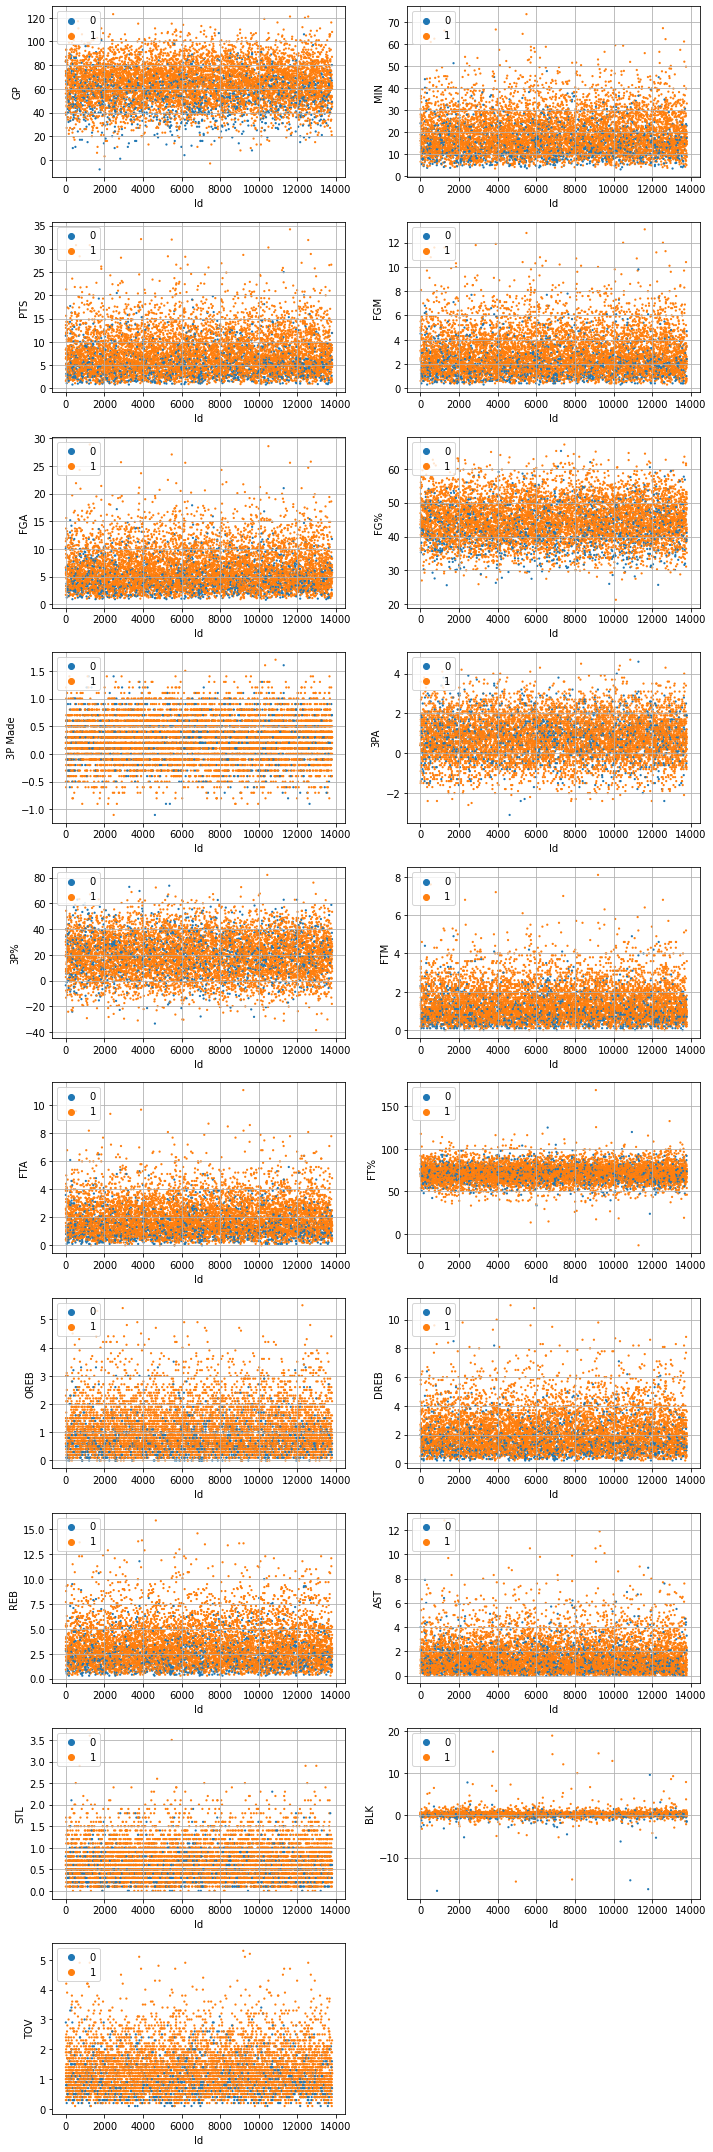

In [20]:
plt.figure(figsize = (10,30))
nrow = 10
ncol = 2
i = 1 
for variable in train.drop(columns = ['Id','TARGET_5Yrs']):
    plt.grid()
    plt.subplot(nrow, ncol, i)
    sns.scatterplot(x = "Id", y = variable, hue = "TARGET_5Yrs", data = train, 
                    legend = 'full',edgecolor = 'none', s = 5)
    i += 1
    plt.legend(loc=2)
plt.tight_layout()
plt.show()

##### **[3.3]** Violin plot of all variables

<Figure size 720x2160 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='GP'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='MIN'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='PTS'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='FGM'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='FGA'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='FG%'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='3P Made'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='3PA'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='3P%'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='FTM'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='FTA'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='FT%'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='OREB'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='DREB'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='REB'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='AST'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='STL'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='BLK'>

<AxesSubplot:>

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='TOV'>

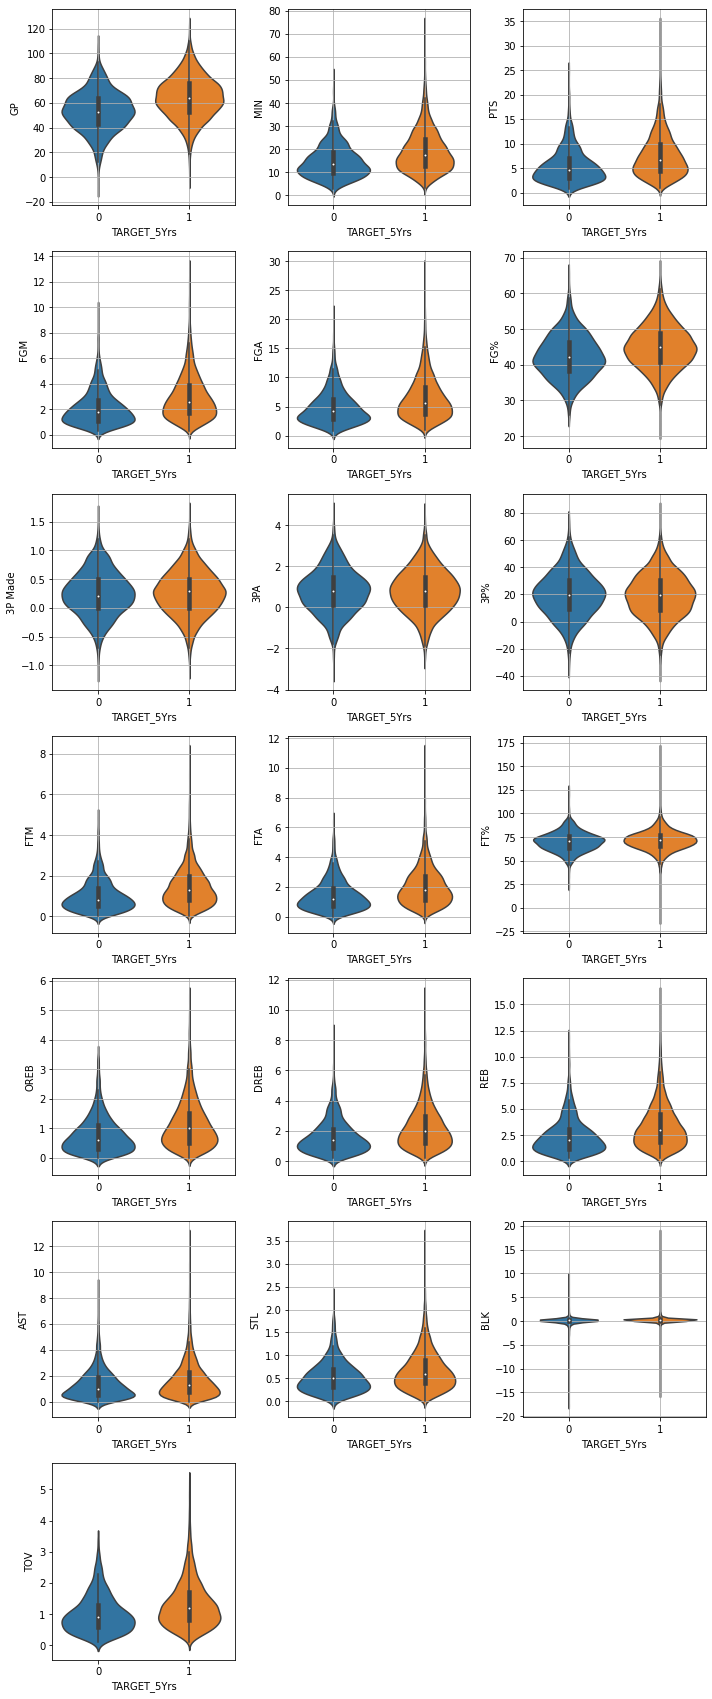

In [21]:
plt.figure(figsize = (10,30))
nrow = 9
ncol = 3
i = 1 
for variable in train.drop(columns = ['Id','TARGET_5Yrs']):
    plt.grid()
    plt.subplot(nrow, ncol, i)
    sns.violinplot(x = "TARGET_5Yrs", y = variable, data = train)
    #plt.legend()
    i += 1
   # plt.legend(loc=2)
plt.tight_layout()
plt.show()

##### **[3.4]** Pairplot for all variables

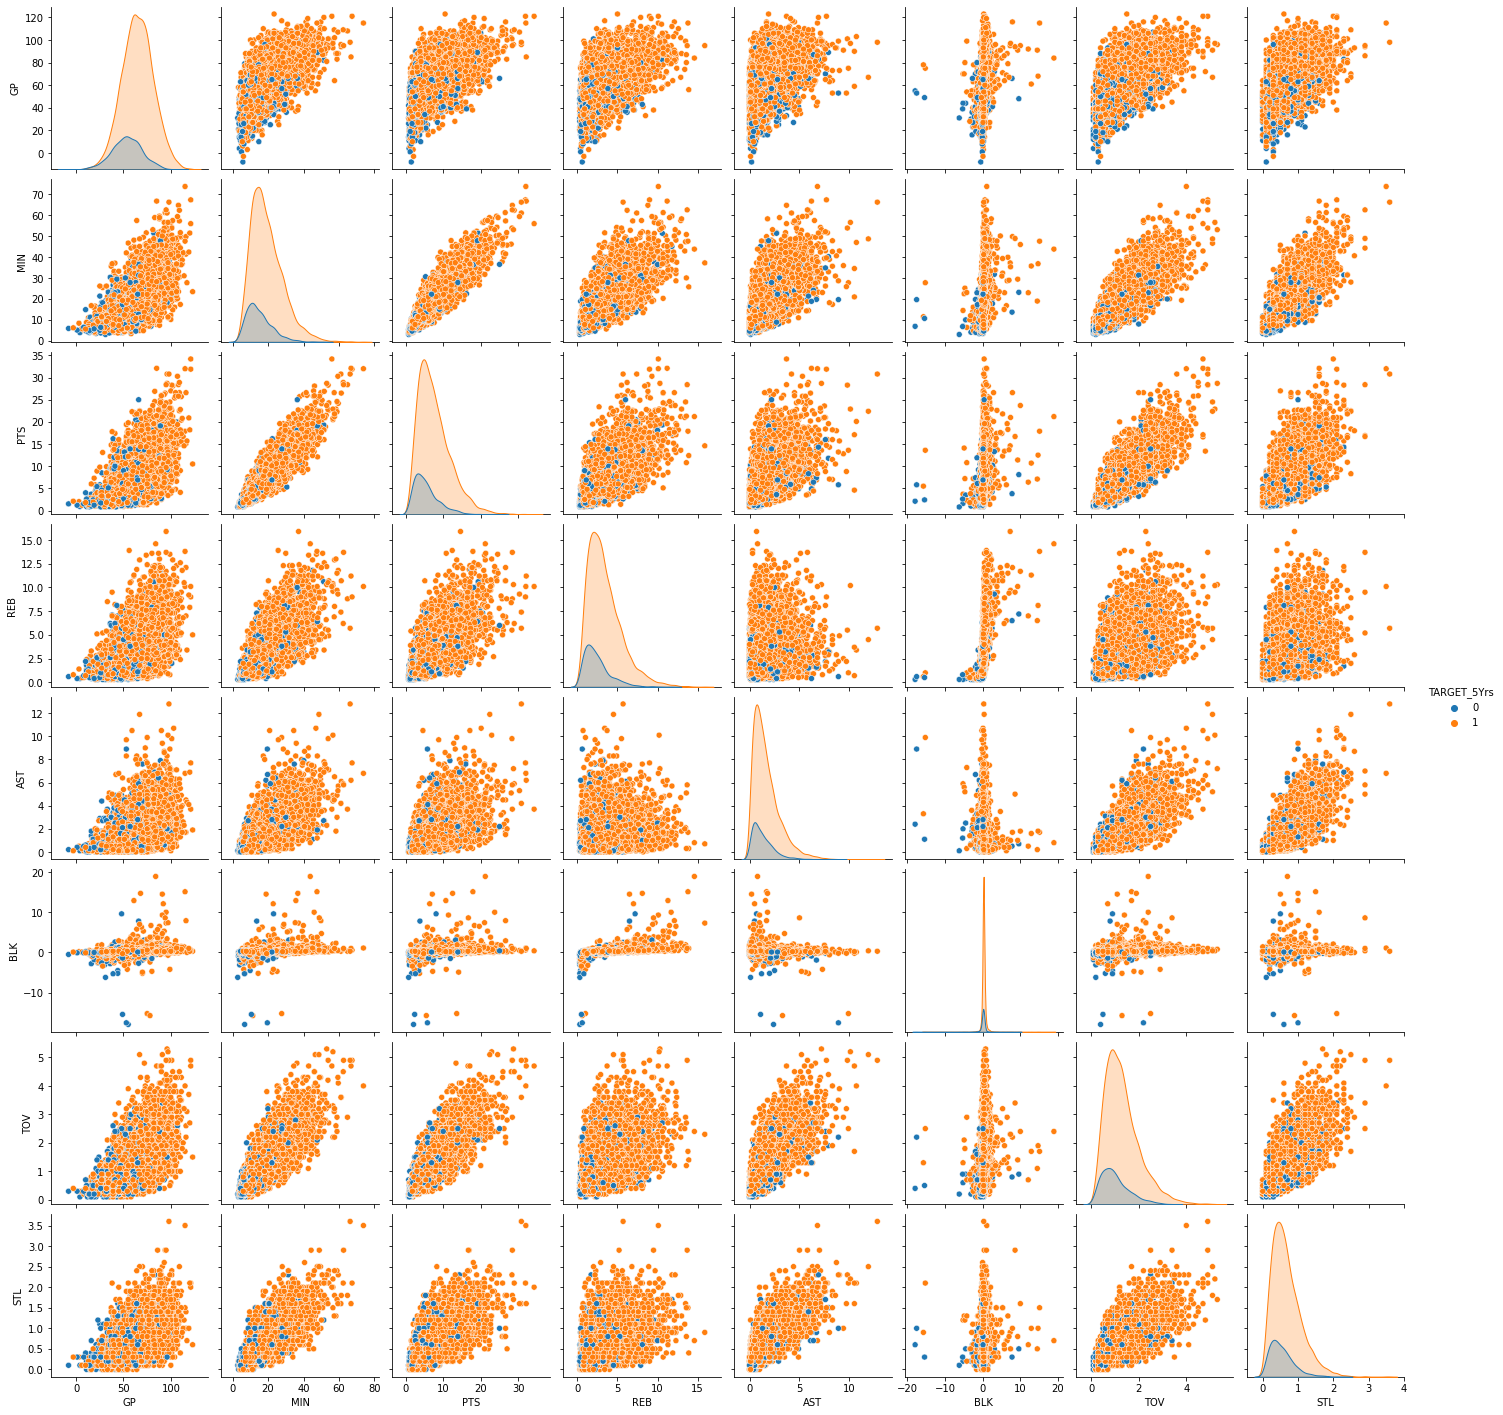

In [22]:
sns.pairplot(train[['GP', 'MIN', 'PTS', 'REB', 'AST', 'BLK', 'TOV', 'STL', 'TARGET_5Yrs']], hue='TARGET_5Yrs')

## 4. Prepare data

##### **[4.1]** Prepare dataset for cleaning

In [23]:
# Remove the Id from train and test, as they are unique for each row and hence not useful for the model
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((8000, 20), (3799, 19))

In [24]:
# Split X and y
y_train = train['TARGET_5Yrs'].reset_index(drop=True)
X_train = train.drop(['TARGET_5Yrs'], axis=1)
X_test = test

# Combine train and test X in order to apply the feature transformation pipeline to the entire dataset
all_X = pd.concat([X_train, X_test]).reset_index(drop=True)
all_X.shape

(11799, 19)

##### **[4.2]** Display box-plots of all X

[Text(0, 0.5, 'Feature names')]

[Text(0.5, 0, 'Numeric values')]

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

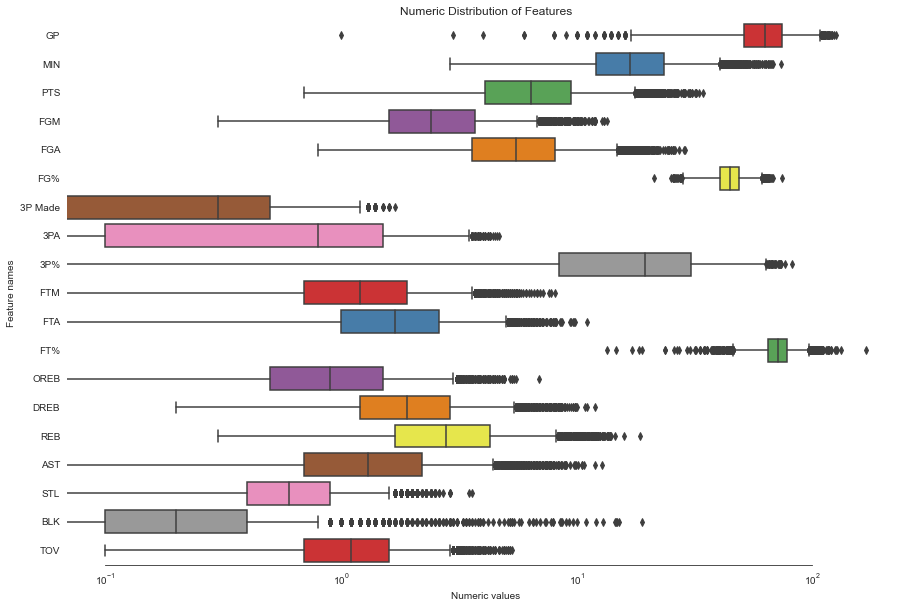

In [25]:
# Create box plots for all X
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=all_X, orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

**Note:**

Given 3 columns: 3P Made, 3PA, 3P% have significant amount of negative values, the mean of these columns are still higher than normal. Which means these 3 columns not only affected by negative values but also high value outliers.

##### **[4.3]** Substitude negative abnormal value

In [26]:
# substitude negative with mode 
def subs_negative_with_mode(all_X):

    for i in all_X:
        col_mode = all_X[all_X[i]>=0][i].mode()[0]
        all_X.loc[all_X[i]<0,i] = col_mode
           
    return all_X

all_X = subs_negative_with_mode(all_X)

##### **[4.4]** Recalculate variables

In [27]:
# recalculate FT%, since the FT% > 100 is not possible
all_X['FT%'] = all_X['FTM']/all_X['FTA']*100

In [28]:
# recalculate 3P%, since NBA official highest 3P% is around 45%
all_X['3P%'] = all_X['3P Made']/all_X['3PA']*100

In [29]:
# recalculate FG%, since above 2 columns are wrong, check for correctness
all_X['FG%'] = all_X['FGM']/all_X['FGA']*100

In [30]:
# check describe again
all_X.describe()

GP           MIN           PTS           FGM           FGA  \
count  11799.000000  11799.000000  11799.000000  11799.000000  11799.000000   
mean      62.814137     18.600347      7.286711      2.816171      6.254191   
std       17.105576      8.868520      4.310929      1.691763      3.582845   
min        1.000000      2.900000      0.700000      0.300000      0.800000   
25%       51.000000     12.050000      4.100000      1.600000      3.600000   
50%       63.000000     16.900000      6.400000      2.400000      5.500000   
75%       74.000000     23.400000      9.500000      3.700000      8.100000   
max      126.000000     73.800000     34.200000     13.400000     28.900000   

                FG%       3P Made           3PA           3P%           FTM  \
count  11799.000000  11799.000000  11799.000000  1.163600e+04  11799.000000   
mean      44.639429      0.378312      1.129782           NaN      1.394881   
std        6.230051      0.262410      0.726637           NaN      0.926116   
min       25.000000     -0.000000      0.000000          -inf      0.000000   
25%       40.322581      0.200000      0.700000  2.941176e+01      0.700000   
50%       44.444444      0.300000      0.900000  3.333333e+01      1.200000   
75%       48.648649      0.500000      1.500000  3.684211e+01      1.900000   
max       81.250000      1.700000      4.700000           inf      8.100000   

                FTA           FT%          OREB          DREB           REB  \
count  11799.000000  11790.000000  11799.000000  11799.000000  11799.000000   
mean       1.949648     71.351301      1.083694      2.172040      3.255115   
std        1.251666     12.141528      0.785685      1.385675      2.080455   
min        0.000000      0.000000      0.000000      0.200000      0.300000   
25%        1.000000     63.888889      0.500000      1.200000      1.700000   
50%        1.700000     70.967742      0.900000      1.900000      2.800000   
75%        2.600000     78.125000      1.500000      2.900000      4.300000   
max       11.100000    200.000000      6.900000     12.000000     18.500000   

                AST           STL           BLK           TOV  
count  11799.000000  11799.000000  11799.000000  11799.000000  
mean       1.628367      0.650267      0.338249      1.257810  
std        1.349378      0.408566      0.590332      0.719774  
min        0.000000      0.000000     -0.000000      0.100000  
25%        0.700000      0.400000      0.200000      0.700000  
50%        1.300000      0.600000      0.200000      1.100000  
75%        2.200000      0.900000      0.400000      1.600000  
max       12.800000      3.600000     18.900000      5.300000

**Note:**

* FT% calculated based on FTM and FTA is having a maximum value of 200% which is impossible, which means there are hidden problems in FTM & FTA.

* Also, NBA official highest 3P% is around 45%, which is much lower than the maximum 82.1% here, recalculate 3P%.

In [31]:
# find inf in recalculated 3P% - 162 rows
all_X.iloc[all_X.index[np.isinf(all_X).any(1)]]

GP   MIN  PTS  FGM  FGA        FG%  3P Made  3PA  3P%  FTM  FTA  \
84     91  29.1  8.1  3.6  5.9  61.016949      0.1 -0.0 -inf  1.3  1.9   
87     72  14.2  8.2  2.9  6.4  45.312500      0.3 -0.0 -inf  2.4  3.1   
436    41   9.4  3.9  1.5  3.4  44.117647      0.1 -0.0 -inf  0.9  1.6   
517    68  19.4  7.2  3.0  6.8  44.117647      0.3  0.0  inf  1.1  1.6   
675    72  20.5  7.3  2.9  6.5  44.615385      0.3  0.0  inf  1.6  2.0   
...    ..   ...  ...  ...  ...        ...      ...  ...  ...  ...  ...   
11554  43   9.9  4.2  1.6  3.4  47.058824      0.3  0.0  inf  0.8  1.1   
11611  68  13.5  3.7  1.8  3.7  48.648649      0.1 -0.0 -inf  0.1  0.3   
11643  39  15.9  4.8  2.0  4.1  48.780488      0.3  0.0  inf  0.6  1.1   
11658  78  15.9  5.7  2.3  4.9  46.938776      0.3 -0.0 -inf  1.4  2.1   
11772  56  13.8  5.3  2.1  5.0  42.000000      0.3 -0.0 -inf  0.8  1.2   

             FT%  OREB  DREB  REB  AST  STL  BLK  TOV  
84     68.421053   2.1   2.8  4.7  2.2  1.4  0.2  1.7  
87     77.419355   0.6   1.5  1.9  1.5  0.7  0.2  1.9  
436    56.250000   0.5   0.9  1.4  0.8  0.1  0.2  0.5  
517    68.750000   1.6   2.3  4.0  0.6  0.8  0.1  1.3  
675    80.000000   1.3   2.7  3.9  2.2  0.8  0.4  2.1  
...          ...   ...   ...  ...  ...  ...  ...  ...  
11554  72.727273   0.8   1.5  2.1  0.5  0.3  0.3  1.0  
11611  33.333333   0.3   1.6  1.9  0.8  0.3  0.2  0.6  
11643  54.545455   1.2   2.3  3.5  0.8  0.6  0.3  0.9  
11658  66.666667   0.9   0.9  1.7  1.4  1.0 -0.0  1.2  
11772  66.666667   0.8   0.9  1.7  1.1  0.6  0.0  0.7  

[162 rows x 19 columns]

In [32]:
# find NaN in recalculated 3P% ang others- 172 rows
all_X.iloc[all_X.index[np.isnan(all_X).any(1)]]

GP   MIN   PTS  FGM   FGA        FG%  3P Made  3PA  3P%  FTM  FTA  \
25     34  10.5   3.3  1.2   2.7  44.444444      0.0  0.0  NaN  1.2  1.7   
195    54  13.1   3.5  1.3   3.7  35.135135     -0.0  0.0  NaN  1.0  1.6   
288    70  17.1   5.6  2.3   5.4  42.592593     -0.0  0.0  NaN  1.0  1.5   
308    58  10.2   4.0  1.7   4.6  36.956522     -0.0  0.0  NaN  0.5  0.8   
315    82  27.8  12.5  5.5  11.8  46.610169      0.0  0.0  NaN  1.8  2.6   
...    ..   ...   ...  ...   ...        ...      ...  ...  ...  ...  ...   
11558  59  12.9   5.1  2.2   4.0  55.000000     -0.0 -0.0  NaN  1.0  1.0   
11689  44  10.4   3.1  1.3   3.1  41.935484      0.0 -0.0  NaN  0.4  0.7   
11760  80  16.0   6.1  2.4   5.4  44.444444     -0.0  0.0  NaN  1.8  2.9   
11786  82  32.9  10.3  4.2   7.1  59.154930      0.0  0.0  NaN  1.9  3.2   
11794  84  21.2   8.7  3.4   6.7  50.746269      0.0 -0.0  NaN  1.7  2.5   

              FT%  OREB  DREB  REB  AST  STL  BLK  TOV  
25      70.588235   1.5   2.4  3.8  0.5  0.2  0.6  0.6  
195     62.500000   0.9   1.6  2.4  0.7  0.7  0.3  1.8  
288     66.666667   2.0   2.1  3.9  0.4  0.7  0.3  1.1  
308     62.500000   0.4   0.9  1.4  1.2  0.2  0.2  1.0  
315     69.230769   1.0   2.4  3.3  5.1  1.1  0.1  2.3  
...           ...   ...   ...  ...  ...  ...  ...  ...  
11558  100.000000   1.0   0.9  1.8  0.2  0.3  0.4  0.6  
11689   57.142857   0.8   1.1  1.8  0.4  0.1  0.3  1.1  
11760   62.068966   1.7   1.8  3.2  1.5  0.7  0.7  1.5  
11786   59.375000   2.6   5.0  7.9  1.4  0.7  0.5  1.9  
11794   68.000000   1.9   2.3  3.9  1.5  0.6  0.3  2.0  

[172 rows x 19 columns]

In [33]:
# Also found some 3PA > 3P Made values, which is not possible, find 273 rows
all_X[all_X['3PA'] < all_X['3P Made']]

GP   MIN  PTS  FGM  FGA        FG%  3P Made  3PA    3P%  FTM  FTA  \
84     91  29.1  8.1  3.6  5.9  61.016949      0.1 -0.0   -inf  1.3  1.9   
87     72  14.2  8.2  2.9  6.4  45.312500      0.3 -0.0   -inf  2.4  3.1   
97     44  21.4  6.4  2.2  6.7  32.835821      0.3  0.1  300.0  2.5  3.3   
191    41   7.4  2.4  0.9  2.7  33.333333      0.3  0.1  300.0  0.3  0.5   
329    51  11.7  5.7  2.5  5.0  50.000000      0.3  0.1  300.0  0.7  0.9   
...    ..   ...  ...  ...  ...        ...      ...  ...    ...  ...  ...   
11611  68  13.5  3.7  1.8  3.7  48.648649      0.1 -0.0   -inf  0.1  0.3   
11643  39  15.9  4.8  2.0  4.1  48.780488      0.3  0.0    inf  0.6  1.1   
11658  78  15.9  5.7  2.3  4.9  46.938776      0.3 -0.0   -inf  1.4  2.1   
11710  52  14.0  4.3  2.0  4.0  50.000000      0.3  0.1  300.0  0.5  0.8   
11772  56  13.8  5.3  2.1  5.0  42.000000      0.3 -0.0   -inf  0.8  1.2   

             FT%  OREB  DREB  REB  AST  STL  BLK  TOV  
84     68.421053   2.1   2.8  4.7  2.2  1.4  0.2  1.7  
87     77.419355   0.6   1.5  1.9  1.5  0.7  0.2  1.9  
97     75.757576   0.9   1.9  2.8  1.7  1.6  0.3  1.8  
191    60.000000   0.3   0.3  0.6  0.8  0.6  0.1  0.6  
329    77.777778   0.3   0.9  1.3  0.8  0.2  0.1  1.0  
...          ...   ...   ...  ...  ...  ...  ...  ...  
11611  33.333333   0.3   1.6  1.9  0.8  0.3  0.2  0.6  
11643  54.545455   1.2   2.3  3.5  0.8  0.6  0.3  0.9  
11658  66.666667   0.9   0.9  1.7  1.4  1.0 -0.0  1.2  
11710  62.500000   1.0   1.7  2.4  1.0  0.9  0.4  0.8  
11772  66.666667   0.8   0.9  1.7  1.1  0.6  0.0  0.7  

[273 rows x 19 columns]

In [34]:
# get mode for needed variables
tpm_mode = all_X['3P Made'].mode()[0]
tpa_mode = all_X['3PA'].mode()[0]
tpp_mode = all_X['3P%'].mode()[0]

ftm_mode = all_X['FTM'].mode()[0]
fta_mode = all_X['FTA'].mode()[0]
ftp_mode = all_X['FT%'].mode()[0]

# find all indexs of 3P Made > 3PA then replace using index
index_3p = all_X[all_X['3P Made'] > all_X['3PA']].index
all_X.loc[index_3p,'3P Made'] = tpm_mode
all_X.loc[index_3p,'3PA'] = tpa_mode
all_X.loc[index_3p,'3P%'] = tpp_mode

# same thing for FT%
index_ft = all_X[all_X['FTM'] > all_X['FTA']].index
all_X.loc[index_ft,'FTM'] = ftm_mode
all_X.loc[index_ft,'FTA'] = fta_mode
all_X.loc[index_ft,'FT%'] = ftp_mode

In [35]:
# check for result - no inf
all_X.iloc[all_X.index[np.isinf(all_X).any(1)]]

Empty DataFrame
Columns: [GP, MIN, PTS, FGM, FGA, FG%, 3P Made, 3PA, 3P%, FTM, FTA, FT%, OREB, DREB, REB, AST, STL, BLK, TOV]
Index: []

In [36]:
# check for result - 3P% still has nan, which are 0/0, fill all these nan with 0
all_X.iloc[all_X.index[np.isnan(all_X).any(1)]]

GP   MIN   PTS  FGM   FGA        FG%  3P Made  3PA  3P%  FTM  FTA  \
25     34  10.5   3.3  1.2   2.7  44.444444      0.0  0.0  NaN  1.2  1.7   
195    54  13.1   3.5  1.3   3.7  35.135135     -0.0  0.0  NaN  1.0  1.6   
288    70  17.1   5.6  2.3   5.4  42.592593     -0.0  0.0  NaN  1.0  1.5   
308    58  10.2   4.0  1.7   4.6  36.956522     -0.0  0.0  NaN  0.5  0.8   
315    82  27.8  12.5  5.5  11.8  46.610169      0.0  0.0  NaN  1.8  2.6   
...    ..   ...   ...  ...   ...        ...      ...  ...  ...  ...  ...   
11558  59  12.9   5.1  2.2   4.0  55.000000     -0.0 -0.0  NaN  1.0  1.0   
11689  44  10.4   3.1  1.3   3.1  41.935484      0.0 -0.0  NaN  0.4  0.7   
11760  80  16.0   6.1  2.4   5.4  44.444444     -0.0  0.0  NaN  1.8  2.9   
11786  82  32.9  10.3  4.2   7.1  59.154930      0.0  0.0  NaN  1.9  3.2   
11794  84  21.2   8.7  3.4   6.7  50.746269      0.0 -0.0  NaN  1.7  2.5   

              FT%  OREB  DREB  REB  AST  STL  BLK  TOV  
25      70.588235   1.5   2.4  3.8  0.5  0.2  0.6  0.6  
195     62.500000   0.9   1.6  2.4  0.7  0.7  0.3  1.8  
288     66.666667   2.0   2.1  3.9  0.4  0.7  0.3  1.1  
308     62.500000   0.4   0.9  1.4  1.2  0.2  0.2  1.0  
315     69.230769   1.0   2.4  3.3  5.1  1.1  0.1  2.3  
...           ...   ...   ...  ...  ...  ...  ...  ...  
11558  100.000000   1.0   0.9  1.8  0.2  0.3  0.4  0.6  
11689   57.142857   0.8   1.1  1.8  0.4  0.1  0.3  1.1  
11760   62.068966   1.7   1.8  3.2  1.5  0.7  0.7  1.5  
11786   59.375000   2.6   5.0  7.9  1.4  0.7  0.5  1.9  
11794   68.000000   1.9   2.3  3.9  1.5  0.6  0.3  2.0  

[172 rows x 19 columns]

In [37]:
all_X['3P%'] = all_X['3P%'].fillna(0)
# check result
all_X.iloc[all_X.index[np.isnan(all_X).any(1)]]
# FT% has 0/0 caused nan, , fill all these nan with 0

GP  MIN  PTS  FGM  FGA        FG%  3P Made  3PA         3P%  FTM  FTA  \
646   37  4.5  1.0  0.4  1.5  26.666667      0.3  0.9   33.333333  0.0  0.0   
1012  45  4.3  1.0  0.4  1.1  36.363636      0.3  0.9   33.333333  0.0  0.0   
1274  33  7.5  1.2  0.6  1.5  40.000000      0.2  0.2  100.000000  0.0  0.0   
2051  40  4.0  0.9  0.4  1.1  36.363636      0.3  0.9   33.333333  0.0  0.0   
3833  35  4.4  1.2  0.5  1.5  33.333333      0.2  0.8   25.000000  0.0  0.0   
5876  20  3.7  1.0  0.4  1.0  40.000000      0.1  0.1  100.000000  0.0  0.0   
7159  31  5.1  1.2  0.5  1.2  41.666667      0.4  1.0   40.000000  0.0  0.0   
8295  43  4.2  0.8  0.3  1.0  30.000000      0.1  0.5   20.000000  0.0  0.0   
9443  30  4.1  0.7  0.3  0.8  37.500000      0.3  0.9   33.333333  0.0  0.0   

      FT%  OREB  DREB  REB  AST  STL  BLK  TOV  
646   NaN   0.1   0.2  0.4  0.1  0.1  0.2  0.1  
1012  NaN   0.1   0.3  0.4  0.2  0.1  0.0  0.1  
1274  NaN   0.3   1.5  1.6  0.1  0.1  0.2  0.2  
2051  NaN   0.1   0.2  0.4  1.0  0.1  0.2  0.3  
3833  NaN   0.1   0.4  0.6  0.1  0.0  0.3  0.1  
5876  NaN   0.0   0.2  0.3  0.1  0.1  0.2  0.2  
7159  NaN   0.1   0.4  0.5  0.1  0.1  0.2  0.2  
8295  NaN   0.0   0.4  0.4  0.3  0.1  0.2  0.3  
9443  NaN   0.5   0.7  1.3  0.0  0.0  0.2  0.1

In [38]:
all_X['FT%'] = all_X['FT%'].fillna(0)
# check result
all_X.iloc[all_X.index[np.isnan(all_X).any(1)]]

Empty DataFrame
Columns: [GP, MIN, PTS, FGM, FGA, FG%, 3P Made, 3PA, 3P%, FTM, FTA, FT%, OREB, DREB, REB, AST, STL, BLK, TOV]
Index: []

In [39]:
# NaN, inf has been substitute by mode, recheck dataframe 
all_X.describe()

GP           MIN           PTS           FGM           FGA  \
count  11799.000000  11799.000000  11799.000000  11799.000000  11799.000000   
mean      62.814137     18.600347      7.286711      2.816171      6.254191   
std       17.105576      8.868520      4.310929      1.691763      3.582845   
min        1.000000      2.900000      0.700000      0.300000      0.800000   
25%       51.000000     12.050000      4.100000      1.600000      3.600000   
50%       63.000000     16.900000      6.400000      2.400000      5.500000   
75%       74.000000     23.400000      9.500000      3.700000      8.100000   
max      126.000000     73.800000     34.200000     13.400000     28.900000   

                FG%       3P Made           3PA           3P%           FTM  \
count  11799.000000  11799.000000  11799.000000  11799.000000  11799.000000   
mean      44.639429      0.379066      1.149436     31.893419      1.392872   
std        6.230051      0.261907      0.708365     14.271902      0.925750   
min       25.000000     -0.000000      0.000000     -0.000000      0.000000   
25%       40.322581      0.200000      0.800000     29.166667      0.700000   
50%       44.444444      0.300000      0.900000     33.333333      1.200000   
75%       48.648649      0.500000      1.500000     36.363636      1.900000   
max       81.250000      1.700000      4.700000    100.000000      8.100000   

                FTA           FT%          OREB          DREB           REB  \
count  11799.000000  11799.000000  11799.000000  11799.000000  11799.000000   
mean       1.949360     71.014935      1.083694      2.172040      3.255115   
std        1.250888     11.744362      0.785685      1.385675      2.080455   
min        0.000000      0.000000      0.000000      0.200000      0.300000   
25%        1.000000     63.636364      0.500000      1.200000      1.700000   
50%        1.700000     70.731707      0.900000      1.900000      2.800000   
75%        2.600000     77.777778      1.500000      2.900000      4.300000   
max       11.100000    100.000000      6.900000     12.000000     18.500000   

                AST           STL           BLK           TOV  
count  11799.000000  11799.000000  11799.000000  11799.000000  
mean       1.628367      0.650267      0.338249      1.257810  
std        1.349378      0.408566      0.590332      0.719774  
min        0.000000      0.000000     -0.000000      0.100000  
25%        0.700000      0.400000      0.200000      0.700000  
50%        1.300000      0.600000      0.200000      1.100000  
75%        2.200000      0.900000      0.400000      1.600000  
max       12.800000      3.600000     18.900000      5.300000

##### **[4.5]** Remove columns

In [40]:
# To avoid excess noise, delete columns with too strong corelations: FGM, FGA, 3PA, FTM, FTA, OREB, DREB
all_X = all_X.drop(['FGM', 'FGA', '3PA', 'FTM', 'FTA', 'OREB', 'DREB'], axis = 1)

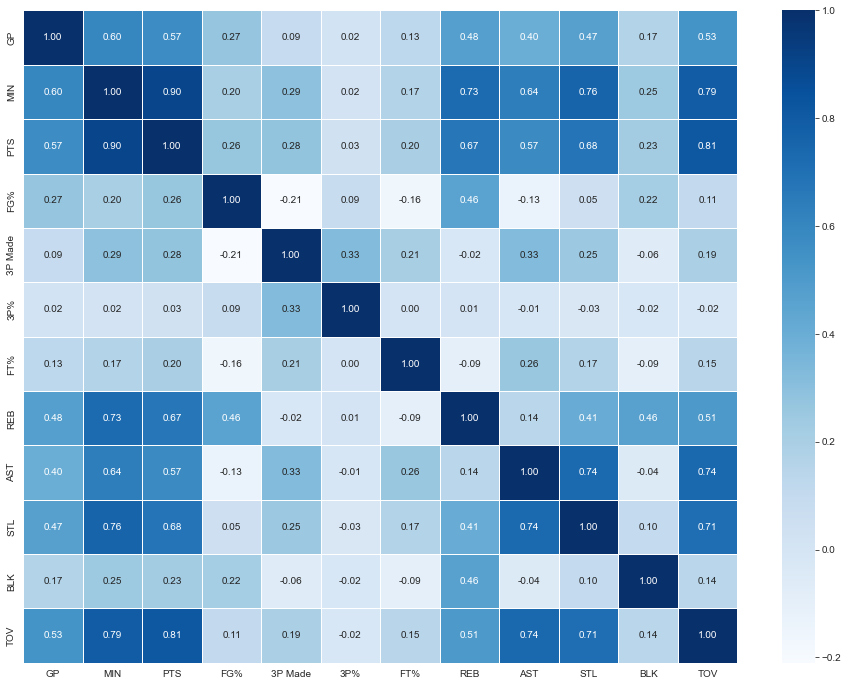

In [41]:
# check correlation
corr_matrix = all_X.corr()
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

##### **[4.6]** Substitude positive abnormal value

By research, the history highest records for all below columns are, for columns with values larger than below values, substitute with mode.
* MIN: 45.8 Wilt Chamberlain
* PTS: 30.1 Michael Jordan
* FG%: 72.8 Robert Williams III
* 3P Made: 3.78 Stephen Curry
* 3P%: 0.45 Steve Kerr
* FT%: 90.69 Stephen Curry
* REB: 22.89 Wilt Chamberlain
* AST: 11.19 Magic Johnson
* STL: 2.71 Alvin Robertson
* BLK:  3.83 Hakeem Olajuwon
* TOV: 4.1 Russell Westbrook


In [42]:
dic = {'MIN': 45.8,
       'PTS': 30.1,
       'FG%': 72.8,
       '3P Made': 3.78, 
       '3P%': 45,
       'FT%': 90.69, 
       'REB': 22.89,
       'AST': 11.19,
       'STL': 2.71,
       'BLK': 3.83, 
       'TOV': 4.1}
# previously subs with value, but looking at the pairplot the distribution is not good, change to subs with mode

In [43]:
for col in dic:
    col_mode = all_X[all_X[col] < dic[col]][col].mode()[0]
    all_X.loc[all_X[col]>dic[col],col] = col_mode

In [44]:
# recheck dataframe 
all_X.describe()

GP           MIN           PTS           FG%       3P Made  \
count  11799.000000  11799.000000  11799.000000  11799.000000  11799.000000   
mean      62.814137     18.221315      7.266285     44.636781      0.379066   
std       17.105576      8.239204      4.257353      6.221122      0.261907   
min        1.000000      2.900000      0.700000     25.000000     -0.000000   
25%       51.000000     12.000000      4.100000     40.322581      0.200000   
50%       63.000000     16.700000      6.400000     44.444444      0.300000   
75%       74.000000     23.100000      9.500000     48.648649      0.500000   
max      126.000000     45.800000     30.100000     72.413793      1.700000   

                3P%           FT%           REB           AST           STL  \
count  11799.000000  11799.000000  11799.000000  11799.000000  11799.000000   
mean      29.882606     69.500917      3.255115      1.626392      0.649097   
std       10.467671     10.085205      2.080455      1.342178      0.405264   
min       -0.000000      0.000000      0.300000      0.000000      0.000000   
25%       29.166667     63.636364      1.700000      0.700000      0.400000   
50%       33.333333     69.230769      2.800000      1.300000      0.600000   
75%       34.482759     76.470588      4.300000      2.200000      0.900000   
max       45.000000     90.476190     18.500000     10.700000      2.700000   

                BLK           TOV  
count  11799.000000  11799.000000  
mean       0.311323      1.247623  
std        0.317173      0.697615  
min       -0.000000      0.100000  
25%        0.200000      0.700000  
50%        0.200000      1.100000  
75%        0.400000      1.600000  
max        3.800000      4.100000

**Note:**

Now the dataset is:

1. Cleared of negative values (subs with mode)
2. FT%, 3P% and FT% are recalculated
3. Cleared of NaN, inf and -inf.

However, there are still significant amount of outliers.

##### **[4.7]** Further working on outlier

<Figure size 720x2160 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='GP'>

<AxesSubplot:>

<AxesSubplot:ylabel='MIN'>

<AxesSubplot:>

<AxesSubplot:ylabel='PTS'>

<AxesSubplot:>

<AxesSubplot:ylabel='FG%'>

<AxesSubplot:>

<AxesSubplot:ylabel='3P Made'>

<AxesSubplot:>

<AxesSubplot:ylabel='3P%'>

<AxesSubplot:>

<AxesSubplot:ylabel='FT%'>

<AxesSubplot:>

<AxesSubplot:ylabel='REB'>

<AxesSubplot:>

<AxesSubplot:ylabel='AST'>

<AxesSubplot:>

<AxesSubplot:ylabel='STL'>

<AxesSubplot:>

<AxesSubplot:ylabel='BLK'>

<AxesSubplot:>

<AxesSubplot:ylabel='TOV'>

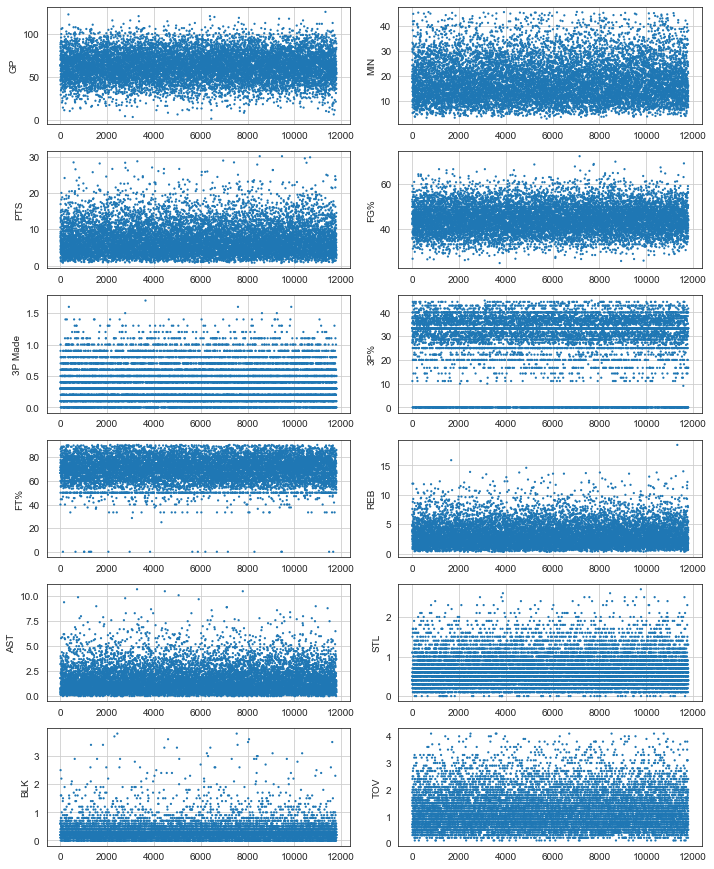

In [45]:
# check distribution of outliear
plt.figure(figsize = (10,30))
nrow = 15
ncol = 2
i = 1 
for variable in all_X:
    plt.grid()
    plt.subplot(nrow, ncol, i)
    sns.scatterplot(x = all_X.index, y = variable, data = all_X, 
                    edgecolor = 'none', s = 5)
    i += 1
    #plt.legend(loc=2)
plt.tight_layout()
plt.show()

[Text(0, 0.5, 'Feature names')]

[Text(0.5, 0, 'Numeric values')]

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

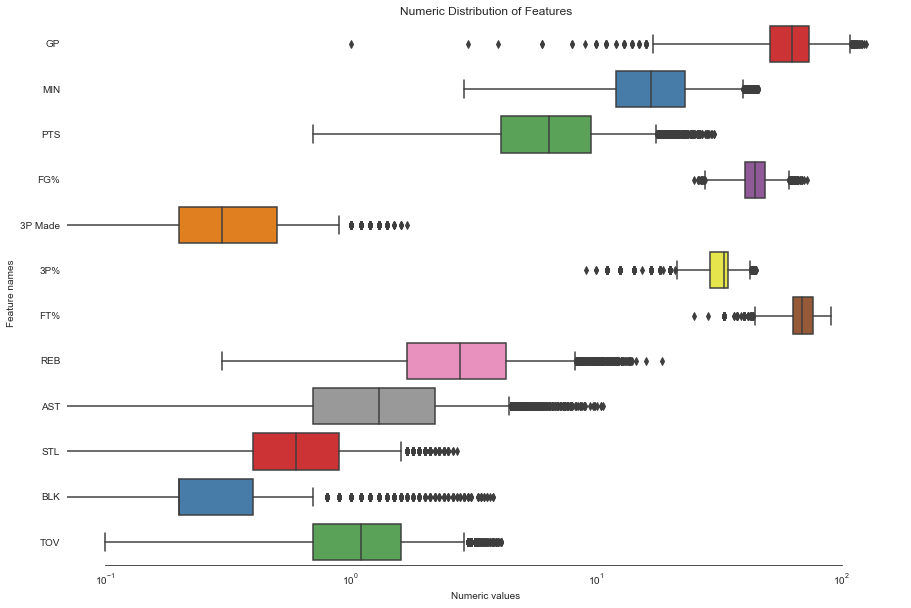

In [46]:
# Create box plots for all X again
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=all_X, orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

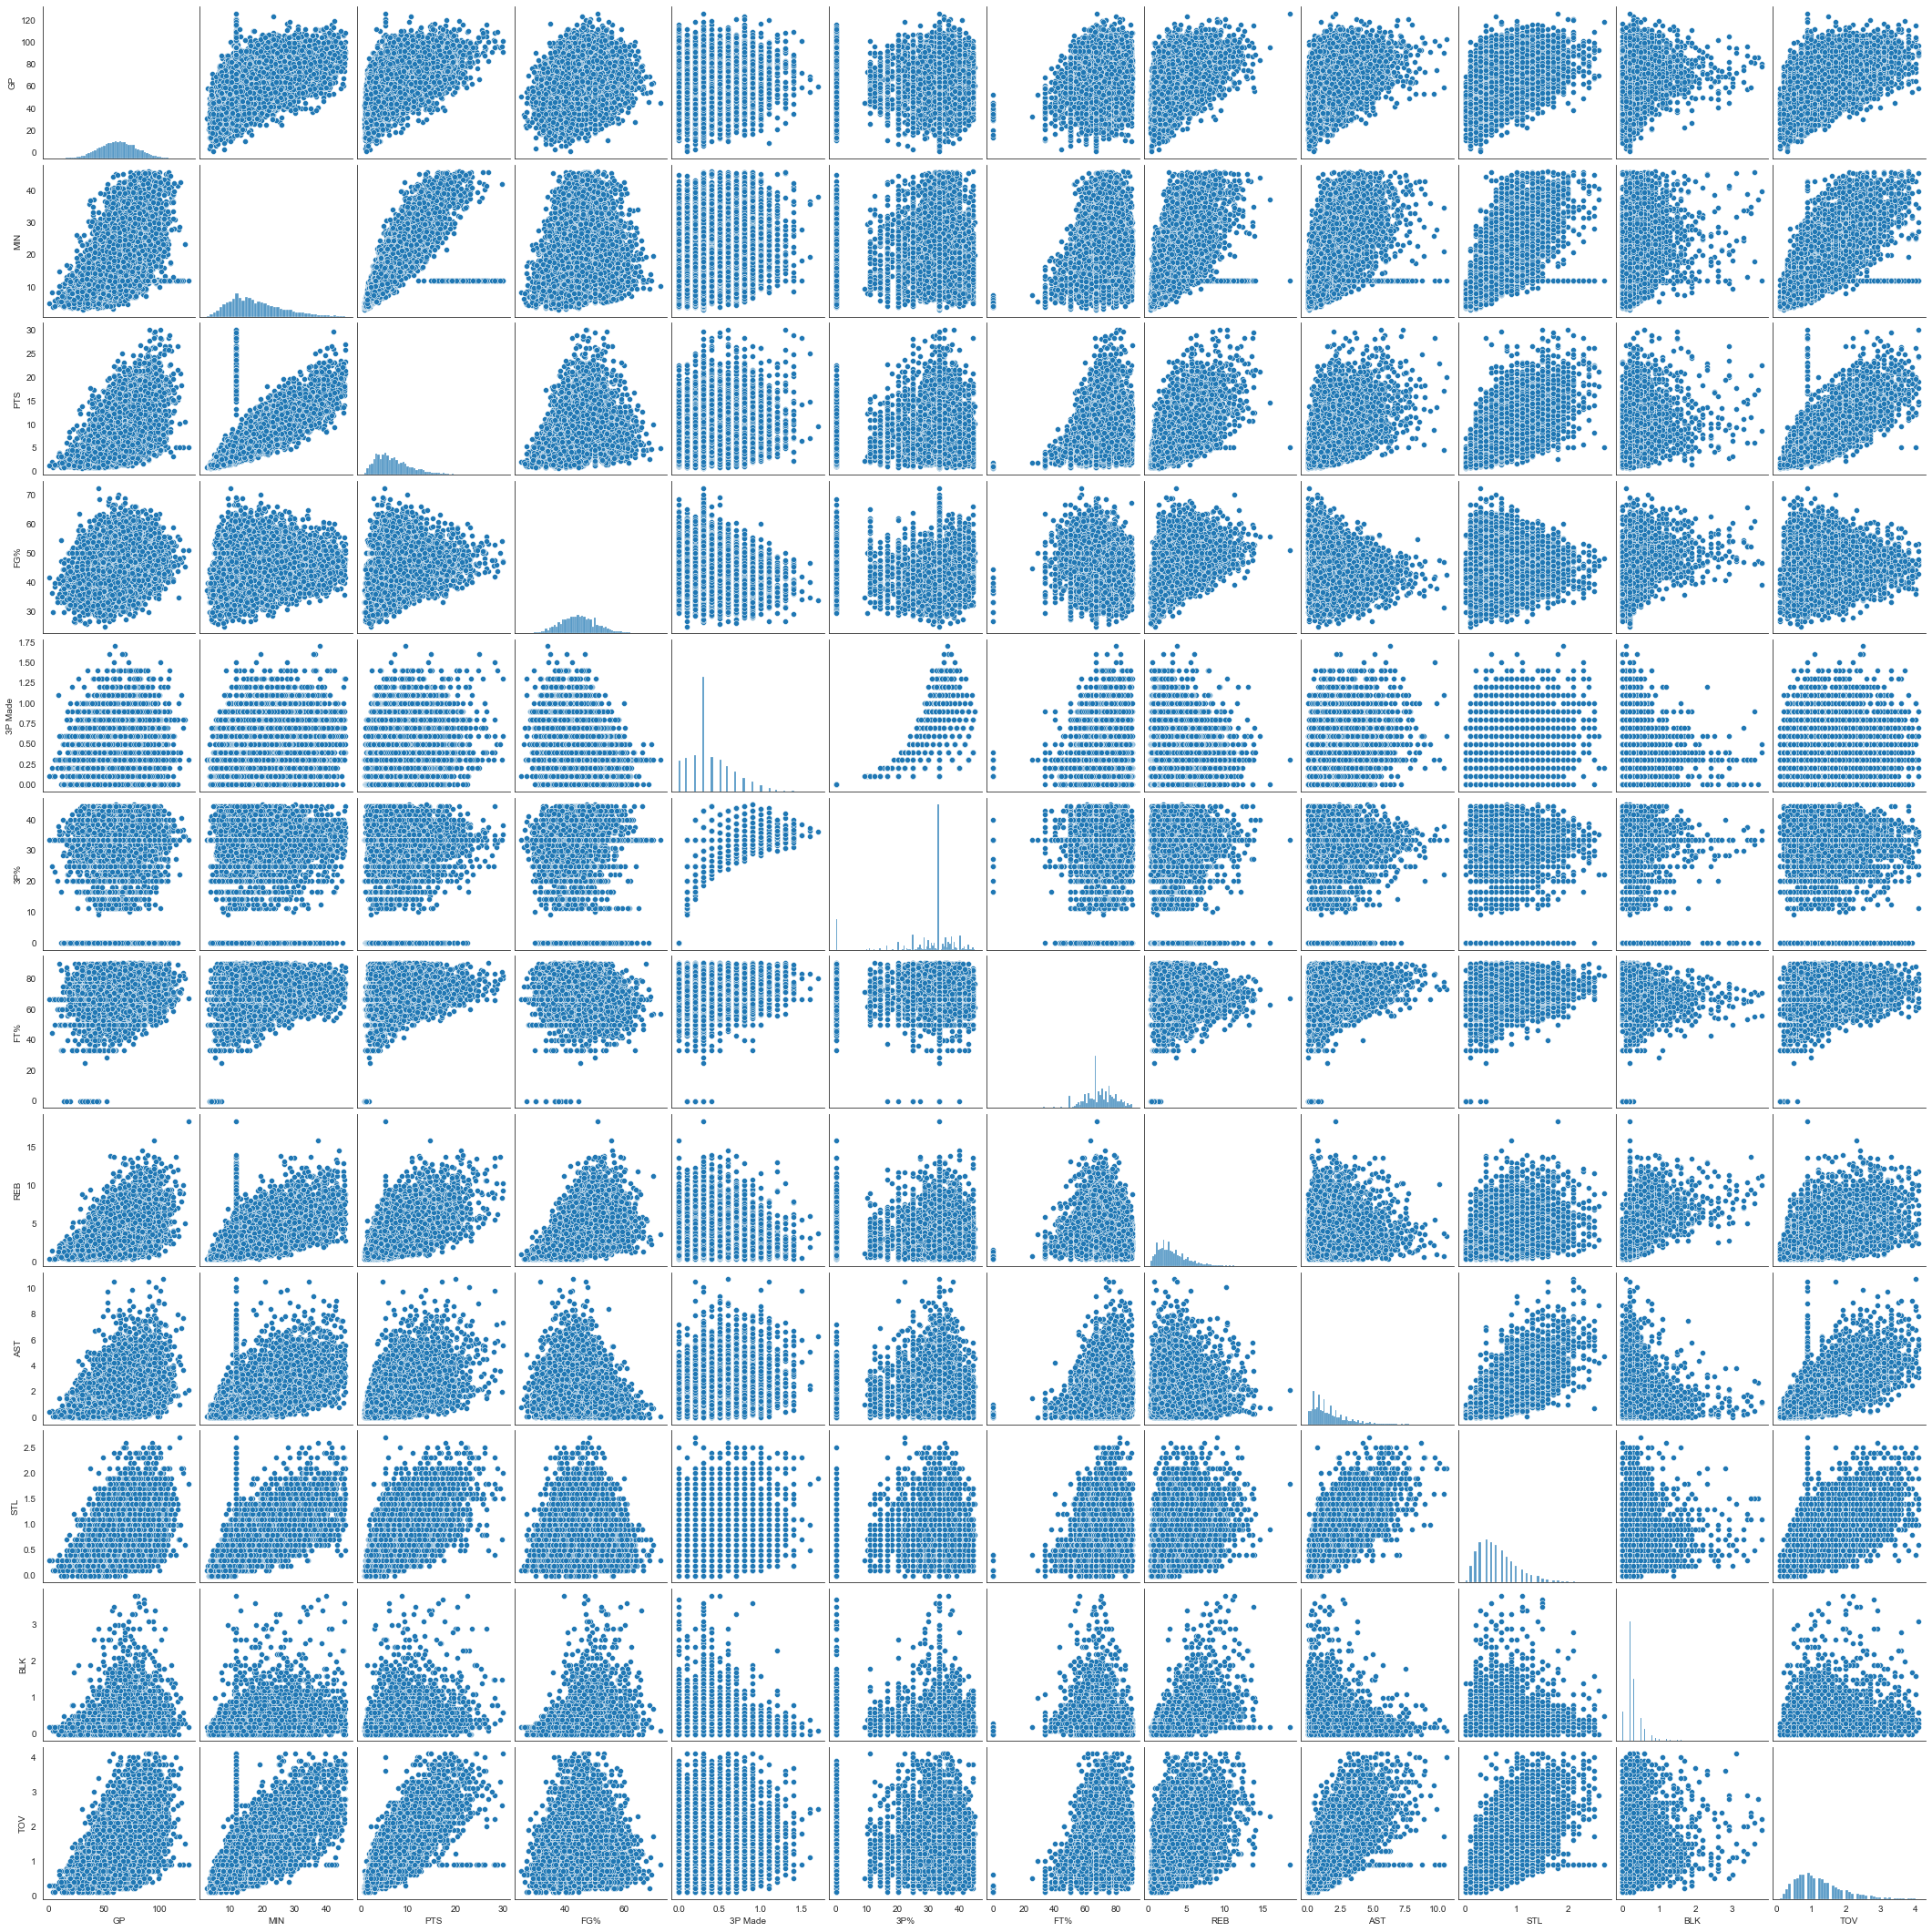

In [47]:
# check pairplot again
sns.pairplot(all_X)

**Note:**
    
we can observe there are many outliers, get number of outliers

In [48]:
# Seperate dataset
df = all_X.iloc[:len(y_train), :]
df['TARGET_5Yrs'] = y_train

In [49]:
for i in df:
    data = df[i]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data_l = df[data <= lower]
    data_u = df[data >= upper]
    print(f'{i} lower percentage:')
    display(data_l['TARGET_5Yrs'].value_counts()/len(data_l))
    print(f'{i} upper percentage:')
    display(data_u['TARGET_5Yrs'].value_counts()/len(data_u))
    print()

GP lower percentage:


0    0.578947
1    0.421053
Name: TARGET_5Yrs, dtype: float64

GP upper percentage:


1    1.0
Name: TARGET_5Yrs, dtype: float64


MIN lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

MIN upper percentage:


1    0.970149
0    0.029851
Name: TARGET_5Yrs, dtype: float64


PTS lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

PTS upper percentage:


1    0.960976
0    0.039024
Name: TARGET_5Yrs, dtype: float64


FG% lower percentage:


1    0.555556
0    0.444444
Name: TARGET_5Yrs, dtype: float64

FG% upper percentage:


1    0.928571
0    0.071429
Name: TARGET_5Yrs, dtype: float64


3P Made lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

3P Made upper percentage:


1    0.877076
0    0.122924
Name: TARGET_5Yrs, dtype: float64


3P% lower percentage:


1    0.812074
0    0.187926
Name: TARGET_5Yrs, dtype: float64

3P% upper percentage:


1    0.879397
0    0.120603
Name: TARGET_5Yrs, dtype: float64


FT% lower percentage:


1    0.652174
0    0.347826
Name: TARGET_5Yrs, dtype: float64

FT% upper percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)


REB lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

REB upper percentage:


1    0.968127
0    0.031873
Name: TARGET_5Yrs, dtype: float64


AST lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

AST upper percentage:


1    0.916185
0    0.083815
Name: TARGET_5Yrs, dtype: float64


STL lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

STL upper percentage:


1    0.969697
0    0.030303
Name: TARGET_5Yrs, dtype: float64


BLK lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

BLK upper percentage:


1    0.9163
0    0.0837
Name: TARGET_5Yrs, dtype: float64


TOV lower percentage:


Series([], Name: TARGET_5Yrs, dtype: float64)

TOV upper percentage:


1    0.966667
0    0.033333
Name: TARGET_5Yrs, dtype: float64


TARGET_5Yrs lower percentage:


1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

TARGET_5Yrs upper percentage:


1    1.0
Name: TARGET_5Yrs, dtype: float64

**Note:**

Compare to other variables, FT%'s lower outliers are still having bigger chance to have logevity. Still consider to delete. To be sontinued...

In [50]:
# check number of outlier in train and all data
print("train lower")
(df <= (df.quantile(0.25) - 1.5 * (df.quantile(0.75)-df.quantile(0.25)))).sum() 
print()

print("alldata lower")
(all_X <= (all_X.quantile(0.25) - 1.5 * (all_X.quantile(0.75)-all_X.quantile(0.25)))).sum() 
print()

print("train upper")
(df >= (df.quantile(0.75) + 1.5 * (df.quantile(0.75)-df.quantile(0.25)))).sum() 
print()

print("alldata upper")
(all_X >= (all_X.quantile(0.75) + 1.5 * (all_X.quantile(0.75)-all_X.quantile(0.25)))).sum() 

train lower


GP               38
MIN               0
PTS               0
FG%               9
3P Made           0
3P%            1027
FT%              92
REB               0
AST               0
STL               0
BLK               0
TOV               0
TARGET_5Yrs    8000
dtype: int64


alldata lower


GP           50
MIN           0
PTS           0
FG%          15
3P Made       0
3P%        1536
FT%         112
REB           0
AST           0
STL           0
BLK           0
TOV           0
dtype: int64


train upper


GP               26
MIN             134
PTS             205
FG%              56
3P Made         301
3P%             199
FT%               0
REB             251
AST             346
STL              99
BLK             454
TOV             210
TARGET_5Yrs    6669
dtype: int64


alldata upper


GP          40
MIN        204
PTS        308
FG%         88
3P Made    426
3P%        294
FT%          0
REB        368
AST        512
STL        300
BLK        679
TOV        313
dtype: int64

**Note:**

STL has less upper outlier in train set

##### **[4.8]** Cluster - below 2 cells are not implemented in models in week2, to be further investigate in week3.

In [51]:
# Use k-mean to find optimal cluster, where score is higher than 0.6
Sil_score = dict()

for i in all_X:
    for j in all_X:
        if i != j:
            for k in range(2,7):
                best = 0.6
                df = all_X[[i,j]]
                labels=cluster.KMeans(n_clusters=k,init="k-means++",random_state=200).fit(df).labels_
                score = silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)
                if score > best:
                    best = score
                    Sil_score[f'({i}, {j})'] = k, best
Sil_score   

{'(MIN, 3P%)': (2, 0.6300845144796937),
 '(PTS, 3P%)': (2, 0.7354850286368935),
 '(FG%, 3P%)': (2, 0.685761151763832),
 '(3P Made, 3P%)': (6, 0.704043353062741),
 '(3P Made, BLK)': (2, 0.6993175699986887),
 '(3P%, MIN)': (2, 0.6300845144825534),
 '(3P%, PTS)': (2, 0.7354850286442911),
 '(3P%, FG%)': (2, 0.6857611517674816),
 '(3P%, 3P Made)': (6, 0.7040433535541467),
 '(3P%, FT%)': (2, 0.605095934347273),
 '(3P%, REB)': (2, 0.7872868000116814),
 '(3P%, AST)': (3, 0.6282484670474698),
 '(3P%, STL)': (6, 0.6640521858705916),
 '(3P%, BLK)': (6, 0.6858634323669287),
 '(3P%, TOV)': (6, 0.6197451393249124),
 '(FT%, 3P%)': (2, 0.6050959343301034),
 '(REB, 3P%)': (2, 0.7872867999910687),
 '(AST, 3P%)': (3, 0.6282484669239224),
 '(STL, 3P%)': (6, 0.6640521845569729),
 '(BLK, 3P Made)': (2, 0.699317570004481),
 '(BLK, 3P%)': (6, 0.6858634316718523),
 '(TOV, 3P%)': (6, 0.6197451383456201)}

In [52]:
# Possible clusters from observation: 
#     BLK&REB 2
#     AST&FG& 2
#     BLK&AST 2
#     BLK&STL 2
#     3P% 3

In [53]:
# Standardise all_X to achieve better result on K-Mean clustering
scaled_data = StandardScaler().fit_transform(all_X)

In [54]:
# Find best number of clusters
sil = []
kmax = 12
my_range=range(2,kmax+1)
for i in my_range:
    kmeans = cluster.KMeans(n_clusters = i).fit(scaled_data)
    labels = kmeans.labels_
    sil.append(silhouette_score(scaled_data, labels, metric =  
    'correlation'))

Text(0.5, 0, 'k')

Text(0, 0.5, 'Silhouette Score')

Text(0.5, 1.0, 'Silhouette Score by K')

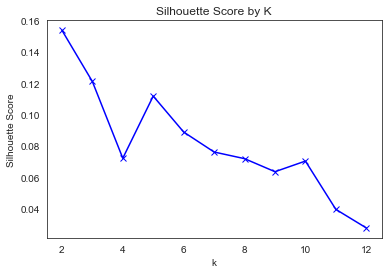

In [55]:
# Plot it, finding 2 is the ideal overall (all columns) cluster
plt.plot(my_range, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by K')
plt.show()

In [56]:
all_X_cluster = all_X.copy()

In [57]:
all_X_cluster['LABELS']=cluster.KMeans(n_clusters=2).fit(scaled_data).labels_

#Analyze labels
clusters=pd.DataFrame(columns=(all_X_cluster.iloc[:,:]).columns)
for i in range(0,2):
    a=all_X_cluster[all_X_cluster['LABELS']==i].mean()
    clusters=clusters.append(a, ignore_index=True)
    
#Show information we want
clusters

GP        MIN        PTS        FG%   3P Made        3P%        FT%  \
0  75.521471  26.910242  11.666165  46.107428  0.469373  30.950981  72.544321   
1  56.167678  13.676649   4.964967  43.867572  0.331832  29.323802  67.909091   

        REB       AST       STL       BLK       TOV  LABELS  
0  4.847162  2.696125  1.020336  0.427295  1.930133     0.0  
1  2.422409  1.066878  0.454924  0.250665  0.890642     1.0

##### **[4.9]** Seperate dataset

In [58]:
X_train = all_X_cluster.iloc[:len(y_train), :]
X_test = all_X_cluster.iloc[len(y_train):, :]
X_train.shape, y_train.shape, X_test.shape

((8000, 13), (8000,), (3799, 13))

##### **[4.10]** Standardise

In [59]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and apply the scaling on data and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Save the scaler into the folder models and call the file scaler.joblib
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

##### **[4.11]** Split dataset

In [61]:
# Split the data (80%) randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

##### **[4.12]** Oversampling

In [62]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Distribution of raw trainset y_train
print('Distribution of raw trainset y_train：{}'.format(Counter(y_train)))

# Distribution of trainset y_ros with oversampling
ros = RandomOverSampler(random_state=0, sampling_strategy='auto') 
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Distribution of trainset y_ros with oversampling：{}'.format(Counter(y_ros)))

# Distribution of trainset y_sos with SMOTE
sos = SMOTE(random_state=0)
X_sos, y_sos = sos.fit_resample(X_train, y_train)
print('Distribution of trainset y_sos with SMOTE：{}'.format(Counter(y_sos)))

# Distribution of trainset y_kos with SMOTETomek
kos = SMOTETomek(random_state=0)  # 综合采样
X_kos, y_kos = kos.fit_resample(X_train, y_train)
print('Distribution of trainset y_kos with SMOTETomek：{}'.format(Counter(y_kos)))

Distribution of raw trainset y_train：Counter({1: 5335, 0: 1065})
Distribution of trainset y_ros with oversampling：Counter({1: 5335, 0: 5335})
Distribution of trainset y_sos with SMOTE：Counter({1: 5335, 0: 5335})
Distribution of trainset y_kos with SMOTETomek：Counter({1: 5320, 0: 5320})


##### **[4.12]** Save the different sets in the folder `data/processed`

In [63]:
np.save('../data/processed/X_train', X_train)
np.save('../data/processed/y_train', y_train)

np.save('../data/processed/X_ros', X_ros)
np.save('../data/processed/y_ros', y_ros)

np.save('../data/processed/X_ros', X_sos)
np.save('../data/processed/y_ros', y_sos)

np.save('../data/processed/X_ros', X_kos)
np.save('../data/processed/y_ros', y_kos)

np.save('../data/processed/X_val', X_val)
np.save('../data/processed/y_val', y_val)

np.save('../data/processed/X_test', X_test)